<a href="https://colab.research.google.com/github/thdnjs0730/2024-1-my-BDA/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_03%EC%A1%B0_20231596_%EC%B5%9C%EC%86%8C%EC%9B%90_20231596_%EC%B5%9C%EC%86%8C%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 청소년 상담 프로그램 제안
---

## 주제 개요
- 갈수록 높아지는 청소년의 우울감 경험률
- 청소년들의 거주 및 이동 지역을 분석해, 효과적인 청소년
상담 프로그램 제안

## 사용 데이터
1. '202403_202403_주민등록 인구 기타현황(아동청소년청년 인구현황)_ChYouth.csv'
2. '청소년 우울감 경험률.csv'
3. '서울교통공사.csv'

---
## 파이썬 설치 확인


In [48]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [49]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [50]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


## 코랩에서 한글 처리

In [51]:
!pip  install koreanize_matplotlib

## 그래프 해상도 설정

In [52]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi':'100'})

In [53]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

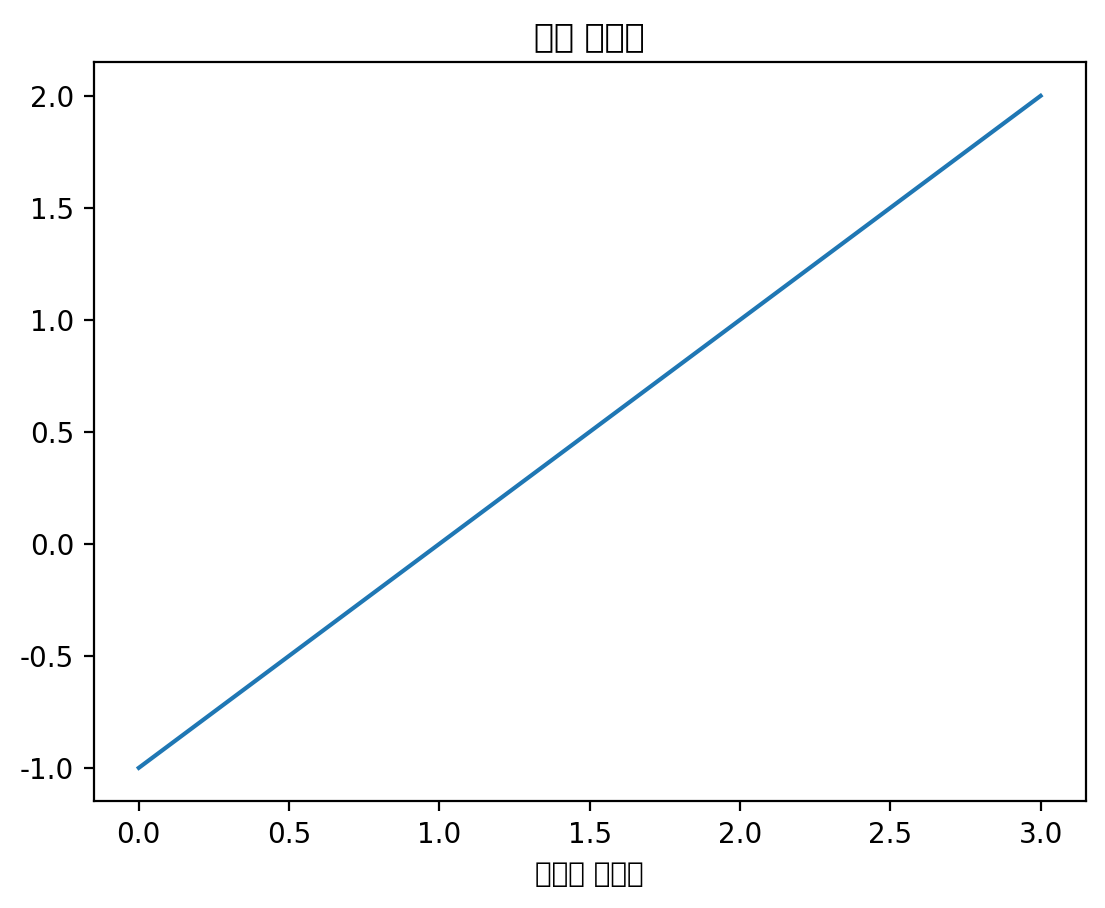

In [54]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('한글 테스트')
plt.xlabel('간단한 그래프')
plt.show()

---
## 1. 청소년 우울감 예측





### 데이터 로드 및 전처리

In [62]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# 데이터 로드
dep_pre_df = pd.read_csv('청소년 우울감 경험률.csv')

In [64]:
# 데이터 전처리: 중학생과 고등학생의 우울감 경험률 합산
dep_pre_df['총합'] = dep_pre_df['중학생'] + dep_pre_df['고등학생']

# 입력 변수(X)와 목표 변수(y) 설정
X = dep_pre_df[['연도']]
y = dep_pre_df['총합']

In [65]:
# 데이터 확인
print(dep_pre_df.head())

     연도   중학생  고등학생    총합
0  2011  30.0  35.5  65.5
1  2012  28.2  32.6  60.8
2  2013  29.0  32.6  61.6
3  2014  24.4  28.8  53.2
4  2015  21.2  25.6  46.8


### 모델 학습 및 예측

In [66]:
# SVR 모델 생성 및 학습
svr_model = SVR(kernel='rbf', C=11)  # 가우시안 RBF 커널 사용
svr_model.fit(X, y)

SVR(C=11)

In [67]:
# 2011년부터 2025년까지 예측
X_future = np.arange(2011, 2026).reshape(-1, 1)
y_pred = svr_model.predict(X_future)

# 2023년부터 2025년까지의 예측값 출력
future_predictions = {year: pred for year, pred in zip(range(2023, 2026), y_pred[-3:])}
for year, pred in future_predictions.items():
    print(f"{year}년 예측값: {pred:.2f}")

2023년 예측값: 57.98
2024년 예측값: 58.83
2025년 예측값: 58.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

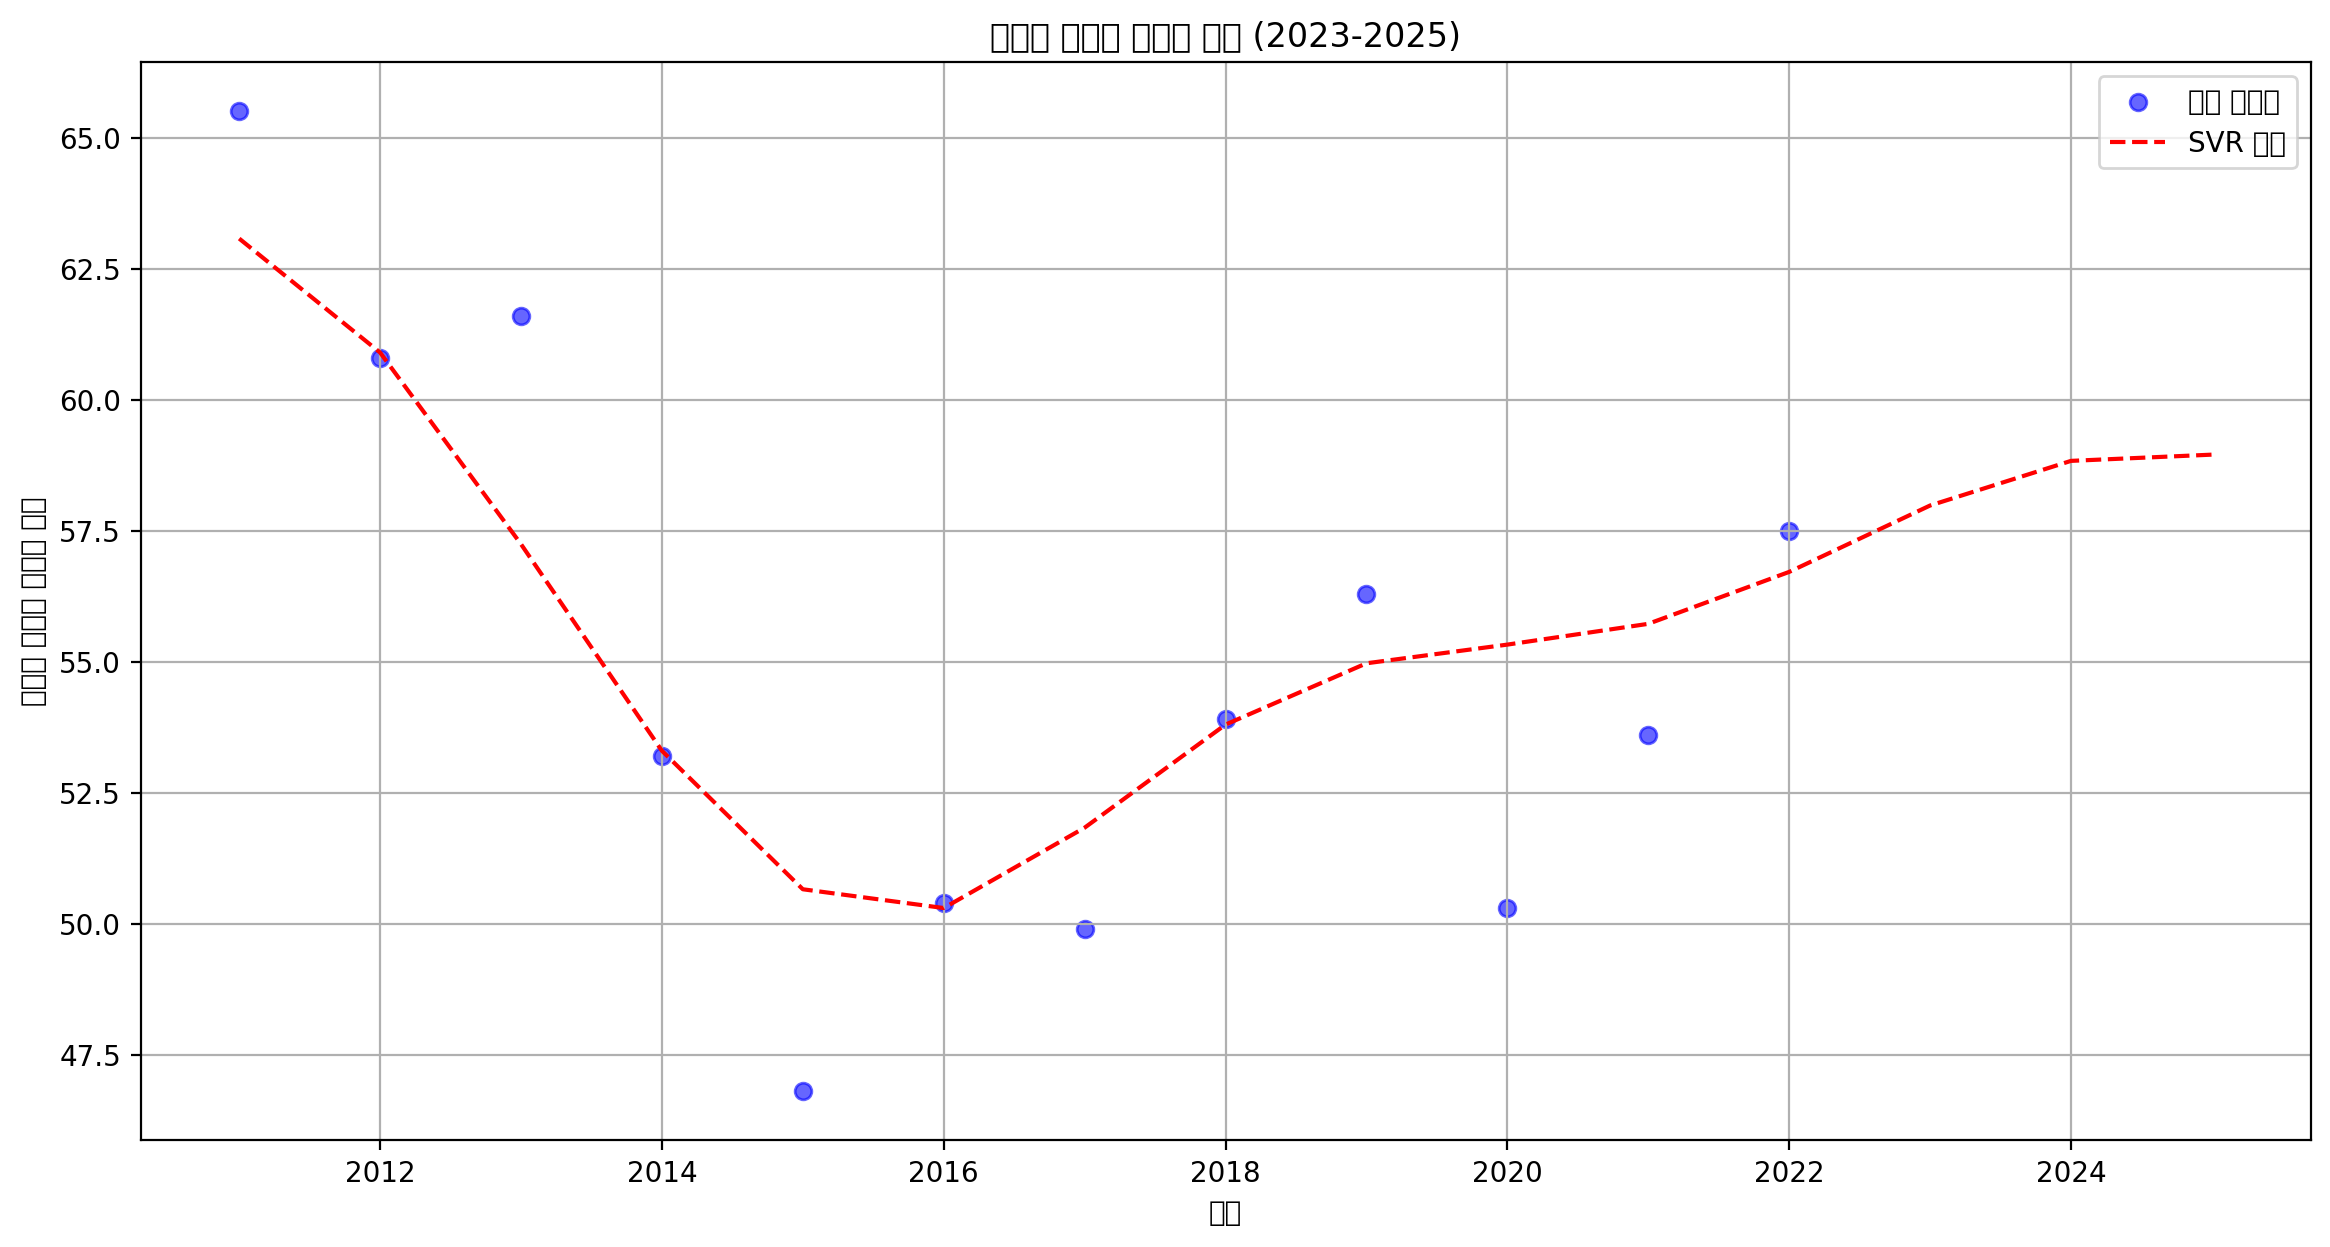

In [68]:
# 시각화: 실제 데이터와 예측값
plt.figure(figsize=(14, 7))
plt.scatter(dep_pre_df['연도'], dep_pre_df['총합'], color='blue', label='실제 데이터', alpha=0.6)
plt.plot(X_future, y_pred, color='red', linestyle='--', label='SVR 예측')
plt.xlabel('연도')
plt.ylabel('청소년 우울감 경험률 총합')
plt.title('청소년 우울감 경험률 예측 (2023-2025)')
plt.legend()
plt.grid(True)
plt.show()

## 2. 청소년 이동 지역

In [12]:
move_df = pd.read_csv("서울교통공사.csv", encoding='cp949')

mx_on = [0] * 20
mx_off = [0] * 20
mx_station = ['']*20
mx_station_on = ['']*20
mx_station_off = ['']*20
mx_time = [0]*20

In [13]:
is_teenager = move_df['승객유형'] == '청소년'
teenager = move_df[is_teenager]

In [14]:
for row in teenager.itertuples(index=False):
    for i in range(20):
        temp = row[i + 7];
        if row[5] == '승차':
            if temp > mx_on[i]:
                mx_on[i] = temp
                t = (i + 6) % 24
                if t == 0:
                    t = 24
                mx_time[i] = t
                mx_station_on[i] = row[4];
        if row[5] == '하차':
            if temp > mx_off[i]:
                mx_off[i] = temp
                t = (i + 6) % 24
                if t == 0:
                    t = 24
                mx_time[i] = t
                mx_station_off[i] = row[4];

        mx_station[i] = '승차: ' + mx_station_on[i] + '\n하차: ' + mx_station_off[i] + '(' + str(mx_time[i]) + ')'


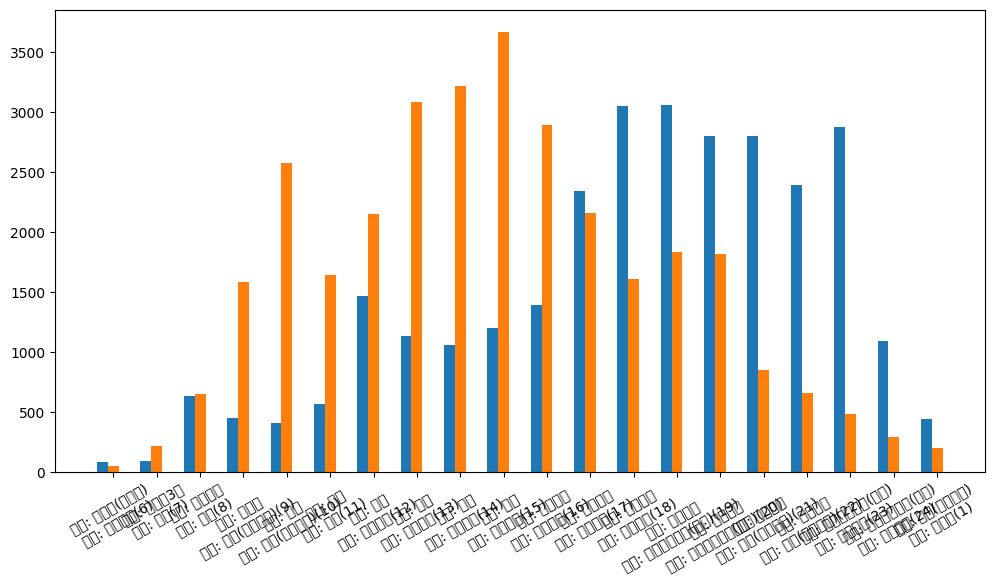

In [17]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, axx = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(20)

plt.bar(index, mx_on, bar_width, label = '승차')
plt.bar(index + bar_width, mx_off, bar_width, label = '하차')
plt.xticks(np.arange(bar_width, 20 + bar_width, 1), mx_station, rotation = 30)
plt.show()

## 3. 청소년 거주 지역

In [18]:
import json
import pandas as pd
import folium

# 서울 행정구역 GeoJSON 파일 불러오기
geo_seoul = json.load(open('SIG_Seoul.geojson', encoding='UTF-8'))

# 서울 행정구역 코드 확인
# print(geo_seoul['features'][0]['properties'])

# 서울 행정구역 위도, 경도 좌표 확인
# print(geo_seoul['features'][0]['geometry'])

# 주민등록 인구 데이터 불러오기
df_pop = pd.read_csv('202403_202403_주민등록 인구 기타현황(아동청소년청년 인구현황)_ChYouth.csv', skiprows=2)

In [19]:
# "청년전체" 열의 데이터를 숫자형으로 변환
df_pop['청소년 전체'] = df_pop['청소년 전체'].str.replace(',', '').astype(int)

# '행정기관코드' 열의 데이터를 문자열로 변환하고 슬라이싱
df_pop['행정기관코드'] = df_pop['행정기관코드'].astype(str).str[:5]

In [20]:
# Folium 지도 생성
map_seoul = folium.Map(location=[37.56, 127], zoom_start=12, tiles='cartodbpositron')

In [21]:
# Choropleth 맵 그리기
bins = list(df_pop["청소년 전체"].quantile([0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
folium.Choropleth(
    geo_data=geo_seoul,
    data=df_pop,
    columns=('행정기관코드', '청소년 전체'),
    key_on='feature.properties.SIG_CD',
    fill_color='Blues',
    nan_fill_color='White',
    fill_opacity=1,
    line_opacity=0.5
).add_to(map_seoul)

In [22]:
# 구 경계선 추가
geo_seoul_sig = json.load(open('SIG_Seoul.geojson', encoding='UTF-8'))
folium.Choropleth(
    geo_data=geo_seoul_sig,
    fill_opacity=0,
    line_weight=2
).add_to(map_seoul)

# Folium 지도 출력
map_seoul.save('map.html')